*En algún punto voy a escribir que voy a hacer un paréntesis para mostrar lo que el libro de Guille hace con el dataset previo al entrenamiento/testeo. Anotar que cada paso va enumerado en puntos y que los puntos 234 son aparte, no son necesarios*

# Regresión Lineal Múltiple para Bitcoin

### Librerías previamente instaladas

<li> pip install pycaret

<li> pip install yfinance 

### Funciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # La que grafica
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf # Para traer la data de Yahoo Finance
#from pandas_datareader import data as pdr # Para leer la data
import datetime
pd.options.display.float_format = '{:.4f}'.format # Flotantes de 4 decimales.

### Carga de dataset

Alguna info para tener en cuenta:

<li> Valid periods: 1d,5d,1mo,3mo,6mo,1y,5y,10y,ytd,max. Periodo de tiempo de la muestra.

<li> Valid intervals:1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo. Tamaño de la vela.

<li> Example: df = yf.download('BTC-USD', start = '2017-08-01', end = '2021-12-27')

<li> The main one I use ds_BTC = yf.download('BTC-USD', period = '1mo', interval = '5m') EL PRINCIPAL QUE USO

In [2]:
#ds_SPY = yf.download('SPY', period = '5d', interval = '5m')
ds_BTC = yf.download('BTC-USD', period = '5d', interval = '60m') #Uno chico
#ds_BTC.describe()
ds_BTC.head()
#ds_SPY.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-18 00:00:00+00:00,40563.9883,40668.4570,40417.2031,40595.6953,40595.6953,0
2022-02-18 01:00:00+00:00,40600.2422,40901.0117,40451.8633,40820.1914,40820.1914,673372160
2022-02-18 02:00:00+00:00,40816.1094,40867.1406,40735.8672,40771.4219,40771.4219,0
2022-02-18 03:00:00+00:00,40772.7852,40784.7695,40665.0898,40717.4023,40717.4023,0
2022-02-18 04:00:00+00:00,40716.7578,40765.6328,40621.1992,40635.8164,40635.8164,0


In [3]:
ds_BTC['DateTime'] = ds_BTC.index # Importante: Incluyo la cronología en una columna
ds_BTC = ds_BTC[['DateTime','Open','High','Low','Close','Adj Close','Volume']]
# ds_BTC.style.hide_index() | Me falta borrar la columna index.

In [4]:
#@title Encabezado del data set
ds_BTC.head()

,DateTime,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,,
2022-02-18 00:00:00+00:00,2022-02-18 00:00:00+00:00,40563.9883,40668.4570,40417.2031,40595.6953,40595.6953,0
2022-02-18 01:00:00+00:00,2022-02-18 01:00:00+00:00,40600.2422,40901.0117,40451.8633,40820.1914,40820.1914,673372160
2022-02-18 02:00:00+00:00,2022-02-18 02:00:00+00:00,40816.1094,40867.1406,40735.8672,40771.4219,40771.4219,0
2022-02-18 03:00:00+00:00,2022-02-18 03:00:00+00:00,40772.7852,40784.7695,40665.0898,40717.4023,40717.4023,0
2022-02-18 04:00:00+00:00,2022-02-18 04:00:00+00:00,40716.7578,40765.6328,40621.1992,40635.8164,40635.8164,0


In [5]:
#@title Cantidad de filas para separar el dataframe en 80/20
cant_filas = ds_BTC.shape[0]  #cant_col = ds_BTC.shape[1]  
cant_filas_test =  int(cant_filas * 0.2)
cant_filas_entrenamiento = cant_filas - cant_filas_test

In [6]:
#@title Matriz de correlación
ds_BTC.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.0000,0.9913,0.9883,0.9752,0.9752,-0.3836
High,0.9913,1.0000,0.9856,0.9881,0.9881,-0.3194
Low,0.9883,0.9856,1.0000,0.9895,0.9895,-0.4218
Close,0.9752,0.9881,0.9895,1.0000,1.0000,-0.3561
Adj Close,0.9752,0.9881,0.9895,1.0000,1.0000,-0.3561
Volume,-0.3836,-0.3194,-0.4218,-0.3561,-0.3561,1.0000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


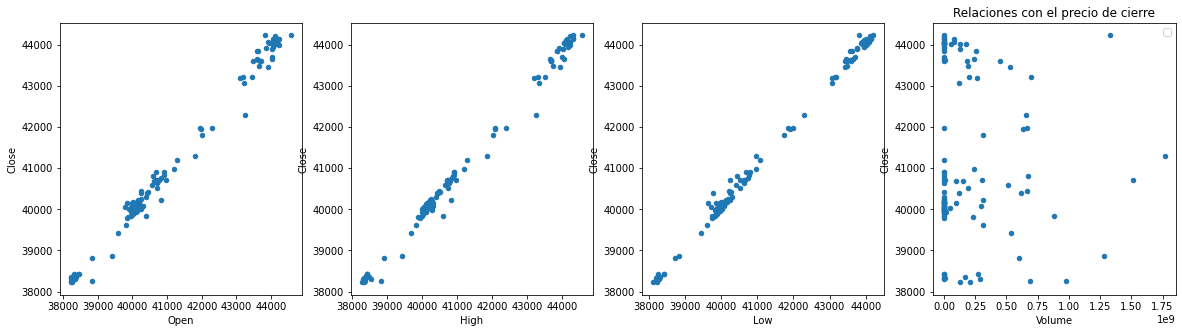

In [7]:
#@title Gráficas de relaciones de variables con el precio
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ds_BTC.plot.scatter(x='Open', y='Close', ax=ax1)
ds_BTC.plot.scatter(x='High', y='Close', ax=ax2)
ds_BTC.plot.scatter(x='Low', y='Close', ax=ax3)
ds_BTC.plot.scatter(x='Volume', y='Close', ax=ax4);
#Definir título y nombres de ejes # ESTA MÁL. CORREGIR
plt.title('Relaciones con el precio de cierre')
plt.legend()
plt.show()

In [7]:
from pycaret.regression import *

In [8]:
s = setup(ds_BTC, target = 'Close')

,Description,Value
0,session_id,6200
1,Target,Close
2,Original Data,"(116, 7)"
3,Missing Values,0
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(81, 37)"


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,1.6407,7.8467,2.1593,1.0000,0.0001,0.0000,0.0070
ridge,Ridge Regression,0.0061,0.0001,0.0076,1.0000,0.0000,0.0000,0.0100
en,Elastic Net,1.5874,6.8026,2.0828,1.0000,0.0001,0.0000,0.0100
omp,Orthogonal Matching Pursuit,0.0015,0.0000,0.0020,1.0000,0.0000,0.0000,0.0180
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0100
llar,Lasso Least Angle Regression,7.6821,76.3399,8.5546,0.9999,0.0002,0.0002,0.0080
lr,Linear Regression,10.1223,417.4308,14.1752,0.9996,0.0004,0.0003,0.6730
gbr,Gradient Boosting Regressor,43.5641,4729.9907,61.7878,0.9961,0.0016,0.0011,0.0330
et,Extra Trees Regressor,55.8105,8350.2106,83.0776,0.9932,0.0021,0.0014,0.1320
rf,Random Forest Regressor,66.2691,10705.4245,94.4366,0.9909,0.0025,0.0017,0.1540


In [10]:
print(best)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=6200,
      selection='cyclic', tol=0.0001, warm_start=False)


In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [12]:
plot_model(best, plot = 'auc')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [13]:
plot_model(best, plot = 'confusion_matrix')

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [14]:
from pycaret.classification import *

In [18]:
s = setup(ds_BTC, target = 'Close')

,Description,Value
0,session_id,1993
1,Target,Close
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(116, 7)"
5,Missing Values,0
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [19]:
best = compare_models()

In [1]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
s = setup(data, target = 'Class variable')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:32:36
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
Number of times pregnant,Categorical
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Numeric
Diastolic blood pressure (mm Hg),Numeric
Triceps skin fold thickness (mm),Numeric
2-Hour serum insulin (mu U/ml),Numeric
Body mass index (weight in kg/(height in m)^2),Numeric
Diabetes pedigree function,Numeric
Age (years),Numeric
Class variable,Label


KeyboardInterrupt: Interrupted by user